In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ROOT
%jsroot on
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import awkward as ak
from time import time
import pickle
from matplotlib import colors

Welcome to JupyROOT 6.26/04


In [2]:
# loading pickle files - takes upto 120 seconds (load it before hand)
dir_ = "/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/skimmed_files/pickle/FTFP"
trueEn ="%s/Beamenergy.pickle"%(dir_)
trueEnPickle = open(trueEn,"rb")
trueEn_pkl = np.asarray(pickle.load(trueEnPickle))
SS_loc ="%s/ShowerStarLay.pickle"%(dir_)
SS_loc_Pickle = open(SS_loc,"rb")
SS_loc_pkl = np.asarray(pickle.load(SS_loc_Pickle))

In [3]:
#

RechitEn ="%s/recHitEn.pickle"%(dir_)
RechitEnPickle = open(RechitEn,"rb")
RechitEn_pkl =pickle.load(RechitEnPickle)


recHitZ ="%s/recHitZ.pickle"%(dir_)
rechitZPickle = open(recHitZ,"rb")
rechitZ_pkl =pickle.load(rechitZPickle)

recHitX ="%s/recHitX.pickle"%(dir_)
rechitXPickle = open(recHitX,"rb")
rechitX_pkl =pickle.load(rechitXPickle)

recHitY ="%s/recHitY.pickle"%(dir_)
rechitYPickle = open(recHitY,"rb")
rechitY_pkl =pickle.load(rechitYPickle)

46647


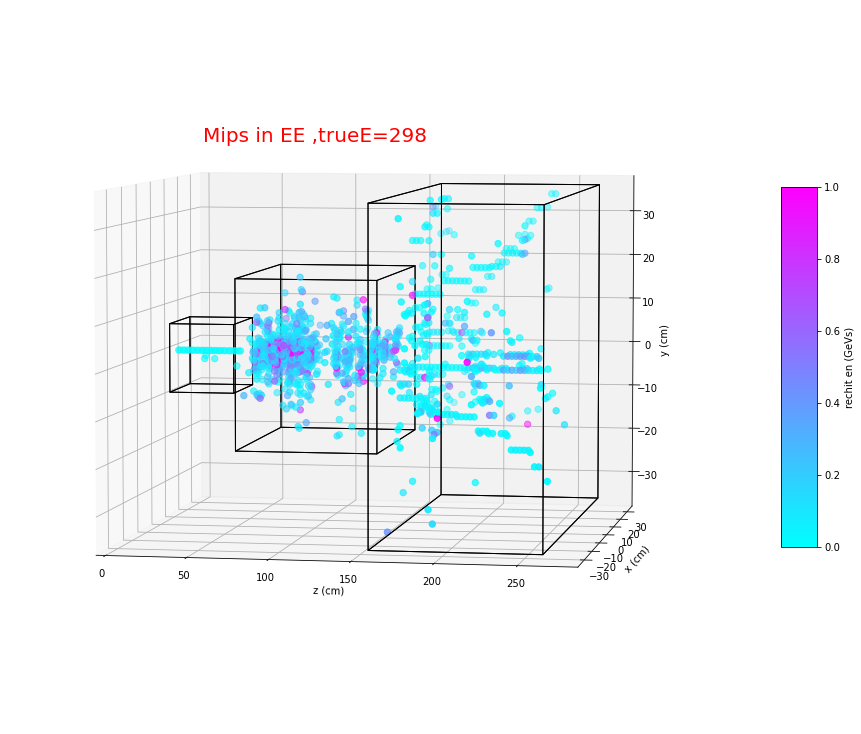

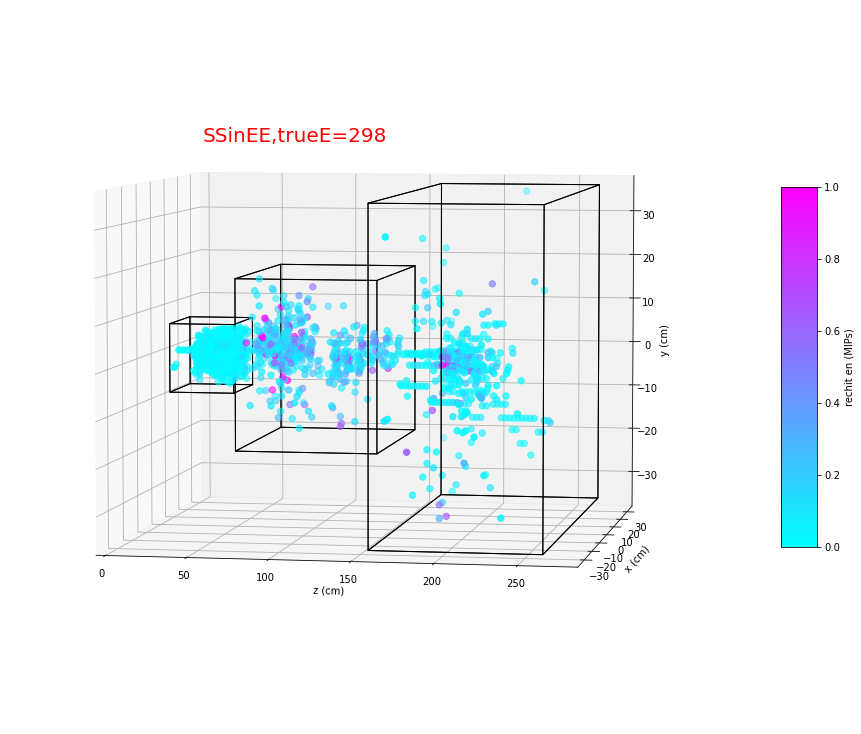

In [4]:
## event displays for 50 GeV pions
en_min =298 #(selecting energy minimum
en_max = 302 # selecting maximun of the energy range you want to look at

###   now loading only the information for the events with the beam enegry in the range (en_min, en_max)
recHit_x = rechitX_pkl[np.logical_and(trueEn_pkl>=en_min ,trueEn_pkl<=en_max)]
print(len(recHit_x))
recHit_y = rechitY_pkl[np.logical_and(trueEn_pkl>=en_min ,trueEn_pkl<=en_max)]
recHit_z = rechitZ_pkl[np.logical_and(trueEn_pkl>=en_min ,trueEn_pkl<=en_max)]
recHit_En = RechitEn_pkl[np.logical_and(trueEn_pkl>=en_min ,trueEn_pkl<=en_max)]
trueEn = trueEn_pkl[np.logical_and(trueEn_pkl>=en_min ,trueEn_pkl<=en_max)]
#print(len(SS_loc))
SS_locat = SS_loc_pkl#[np.logical_and(trueEn_pkl>=en_min ,trueEn_pkl<=en_max)]
en_list=[20,50,80,100,120,200,250,300]
min_ =0
max_ =408 ## number of event displays you want to see
count=0
count1=0
for k in range(min_,max_):
    if(count1==1 and count==1): # or count1>1 and count==1):
        break
    x_pion = np.array(recHit_x[k])
    y_pion = np.array(recHit_y[k])
    z_pion =np.array(recHit_z[k])
    rec_en = recHit_En[k]
    frac =  ((z_pion<54)*0.0105) + (np.logical_and(z_pion>54, z_pion<154)*0.0789) + ((z_pion>154)*0.0316)                                                                                                                                                                         
    en= rec_en*frac
    e = trueEn[k]
    
    if(e>=en_min and e<=en_max):
        if(SS_loc_pkl[k]>28):
            if(count>=1):
               continue
            fig = plt.figure(figsize = (15, 10)) 
            ax = plt.axes(projection ="3d") 
            plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
            ax.view_init(elev=5,azim=-80)          
            e = trueEn[k]
            l1= "trueE="+str(e)[:3] 
            sc=ax.scatter3D(z_pion, x_pion, y_pion,s=40,c = en,cmap="cool",vmin=0,vmax=1.0)
            points = np.array([[13, -7.5,-7.5],
                                   [13, 7.5, -7.5 ],
                                   [13, 7.5, 7.5],
                                   [13,-7.5, 7.5],
                                   [54,-7.5, -7.5],
                                   [54, 7.5, -7.5],
                                   [54, 7.5, 7.5],
                                   [54, -7.5, 7.5 ]])
            Z = points
            verts = [[Z[0],Z[1],Z[2],Z[3]],
                             [Z[4],Z[5],Z[6],Z[7]],
                             [Z[0],Z[1],Z[5],Z[4]],
                             [Z[2],Z[3],Z[7],Z[6]],
                             [Z[1],Z[2],Z[6],Z[5]],
                             [Z[4],Z[7],Z[3],Z[0]]]
            ax.add_collection3d(Poly3DCollection(verts, linewidths=1, edgecolors='black', alpha=.0))
            points = np.array([[64, -18.5,-18.5],
                                       [64, 18.5, -18.5 ],
                                       [64, 18.5, 18.5],
                                       [64,-18.5, 18.5],
                                       [152.5,-18.5, -18.5],
                                       [152.5, 18.5, -18.5],
                                       [152.5, 18.5, 18.5],
                                       [152.5, -18.5, 18.5 ]])
            Z = points
            verts = [[Z[0],Z[1],Z[2],Z[3]],
                             [Z[4],Z[5],Z[6],Z[7]],
                             [Z[0],Z[1],Z[5],Z[4]],
                             [Z[2],Z[3],Z[7],Z[6]],
                             [Z[1],Z[2],Z[6],Z[5]],
                             [Z[4],Z[7],Z[3],Z[0]]]
            ax.add_collection3d(Poly3DCollection(verts, linewidths=1, edgecolors='black', alpha=.0))
            points = np.array([[159, -36,-36],
                                       [159, 36, -36 ],
                                       [159, 36, 36],
                                       [159,-36, 36],
                                       [264,-36, -36],
                                       [264, 36, -36],
                                       [264, 36, 36],
                                       [264, -36, 36 ]])
            Z = points
            verts = [[Z[0],Z[1],Z[2],Z[3]],
                                 [Z[4],Z[5],Z[6],Z[7]],
                                 [Z[0],Z[1],Z[5],Z[4]],
                                 [Z[2],Z[3],Z[7],Z[6]],
                                 [Z[1],Z[2],Z[6],Z[5]],
                                 [Z[4],Z[7],Z[3],Z[0]]]
            ax.add_collection3d(Poly3DCollection(verts, linewidths=1, edgecolors='black', alpha=.0))

            ax.set_xlabel('z (cm)')
            ax.set_ylabel('x (cm)')
            ax.set_zlabel('y (cm)')        
            ax.set_xlim([0,280])
            r = 36.5
            ax.set_ylim([-r,r])
            ax.set_zlim([-r,r])        
            cbar = fig.colorbar(sc,shrink = 0.5, aspect = 10)
            cbar.set_label('rechit en (MIPs)')
            l="SSinEE"+","+l1
            ax.text(-10, 45, 45, l, fontsize = 20, color="r")
            #if(SS_locat[k]>28):
            count+=1
            fp = "./"+str(k)+"_categ1_evedisplay_"+str(e)+".png"                
            #plt.savefig(fp)
        elif (SS_locat[k]<28):
            if(count1>=1):
               continue
            fig = plt.figure(figsize = (15, 10)) 
            ax = plt.axes(projection ="3d") 
            plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
            ax.view_init(elev=5,azim=-80)          
            e = trueEn[k]
            l1= "trueE="+str(e)[:3] 
            sc=ax.scatter3D(z_pion, x_pion, y_pion,s=40,c = en,cmap="cool",vmin=0,vmax=1.0)
            points = np.array([[13, -7.5,-7.5],
                                   [13, 7.5, -7.5 ],
                                   [13, 7.5, 7.5],
                                   [13,-7.5, 7.5],
                                   [54,-7.5, -7.5],
                                   [54, 7.5, -7.5],
                                   [54, 7.5, 7.5],
                                   [54, -7.5, 7.5 ]])
            Z = points
            verts = [[Z[0],Z[1],Z[2],Z[3]],
                             [Z[4],Z[5],Z[6],Z[7]],
                             [Z[0],Z[1],Z[5],Z[4]],
                             [Z[2],Z[3],Z[7],Z[6]],
                             [Z[1],Z[2],Z[6],Z[5]],
                             [Z[4],Z[7],Z[3],Z[0]]]
            ax.add_collection3d(Poly3DCollection(verts, linewidths=1, edgecolors='black', alpha=.0))
            points = np.array([[64, -18.5,-18.5],
                                       [64, 18.5, -18.5 ],
                                       [64, 18.5, 18.5],
                                       [64,-18.5, 18.5],
                                       [152.5,-18.5, -18.5],
                                       [152.5, 18.5, -18.5],
                                       [152.5, 18.5, 18.5],
                                       [152.5, -18.5, 18.5 ]])
            Z = points
            verts = [[Z[0],Z[1],Z[2],Z[3]],
                             [Z[4],Z[5],Z[6],Z[7]],
                             [Z[0],Z[1],Z[5],Z[4]],
                             [Z[2],Z[3],Z[7],Z[6]],
                             [Z[1],Z[2],Z[6],Z[5]],
                             [Z[4],Z[7],Z[3],Z[0]]]
            ax.add_collection3d(Poly3DCollection(verts, linewidths=1, edgecolors='black', alpha=.0))
            points = np.array([[159, -36,-36],
                                       [159, 36, -36 ],
                                       [159, 36, 36],
                                       [159,-36, 36],
                                       [264,-36, -36],
                                       [264, 36, -36],
                                       [264, 36, 36],
                                       [264, -36, 36 ]])
            Z = points
            verts = [[Z[0],Z[1],Z[2],Z[3]],
                                 [Z[4],Z[5],Z[6],Z[7]],
                                 [Z[0],Z[1],Z[5],Z[4]],
                                 [Z[2],Z[3],Z[7],Z[6]],
                                 [Z[1],Z[2],Z[6],Z[5]],
                                 [Z[4],Z[7],Z[3],Z[0]]]
            ax.add_collection3d(Poly3DCollection(verts, linewidths=1, edgecolors='black', alpha=.0))

            ax.set_xlabel('z (cm)')
            ax.set_ylabel('x (cm)')
            ax.set_zlabel('y (cm)')        
            ax.set_xlim([0,280])
            r = 36.5
            ax.set_ylim([-r,r])
            ax.set_zlim([-r,r])        
            cbar = fig.colorbar(sc,shrink = 0.5, aspect = 10)
            cbar.set_label('rechit en (GeVs)')
            l="Mips in EE"+" ,"+l1
            ax.text(-10, 45, 45, l, fontsize = 20, color="r")
            #if(SS_locat[k]>28):
            count1+=1
            fp = "./"+str(k)+"_categ1_evedisplay_"+str(e)+".png"




(230,)
[0.705, 1.91, 0.844, 0.896, 0.909, 0.768, ... 3.01, 1.69, 0.617, 1.11, 0.727, 1.23]


/tmp/ipykernel_520/2800887290.py:25: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Energy sum in FH+AH')

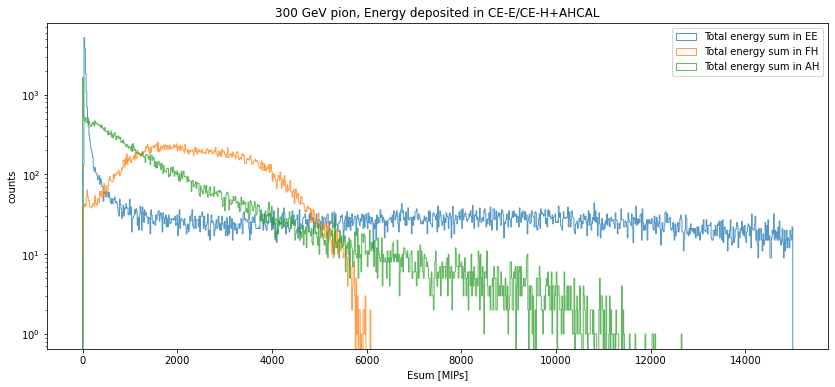

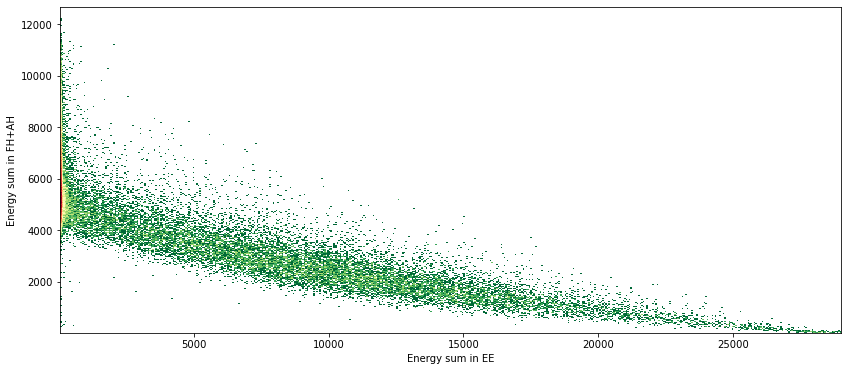

In [5]:
fig = plt.figure(figsize=(14.0,6.0))
## total energy sum in MIPs
print(np.shape(RechitEn_pkl[0]))
print(RechitEn_pkl[0])
en_min = 298
en_max= 302
rechitEn_pkl = RechitEn_pkl[np.logical_and(trueEn_pkl>=en_min ,trueEn_pkl<=en_max)]
rechitZ1_pkl = rechitZ_pkl[np.logical_and(trueEn_pkl>=en_min ,trueEn_pkl<=en_max)]
Esum = ak.sum(rechitEn_pkl,axis=1)

## energy sum in EE
Esum_EE = ak.sum(rechitEn_pkl[rechitZ1_pkl<54], axis=1)
Esum_FH = ak.sum(rechitEn_pkl[np.logical_and(rechitZ1_pkl>54,rechitZ1_pkl<154)], axis=1)
Esum_AH = ak.sum(rechitEn_pkl[rechitZ1_pkl>154], axis=1)
#fig, ax = plt.subplots(figsize=(20,10))
plt.hist(Esum_EE, bins=1000, histtype='step', range=[0,15000],alpha=0.75,label='Total energy sum in EE')
plt.hist(Esum_FH,  bins=1000,histtype='step', range=[0,15000],alpha=0.75,label='Total energy sum in FH')
plt.hist(Esum_AH,  bins=1000, histtype='step',range=[0,15000],alpha=0.75,label='Total energy sum in AH')
#plt.hist(Esum,  bins=1000, histtype='step',range=[0,15000],alpha=0.5,label='Total energy')

plt.xlabel('Esum [MIPs]')
plt.ylabel('counts')
#plt.SetLogy()
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title("300 GeV pion, Energy deposited in CE-E/CE-H+AHCAL")
import matplotlib.pyplot as plt1

## making 2D plots
fig1 = plt1.figure(figsize=(14.0,6.0))

plt1.hist2d(Esum_EE,(Esum_FH +Esum_AH), bins=(500,500),norm = colors.LogNorm(), 
           cmap ="RdYlGn_r") # ,bins=1000, density=False)
#plt.ylim(0,450)
plt1.xlabel('Energy sum in EE')
plt1.ylabel('Energy sum in FH+AH')
#plt.xlim(0,5)

(230,)
[0.705, 1.91, 0.844, 0.896, 0.909, 0.768, ... 3.01, 1.69, 0.617, 1.11, 0.727, 1.23]


Text(0, 0.5, 'counts')

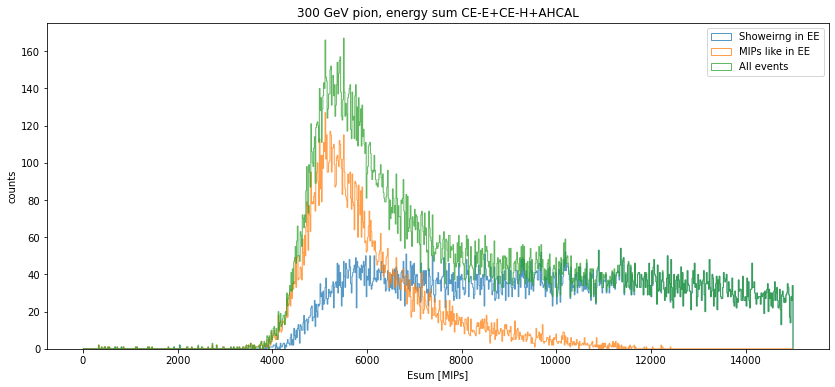

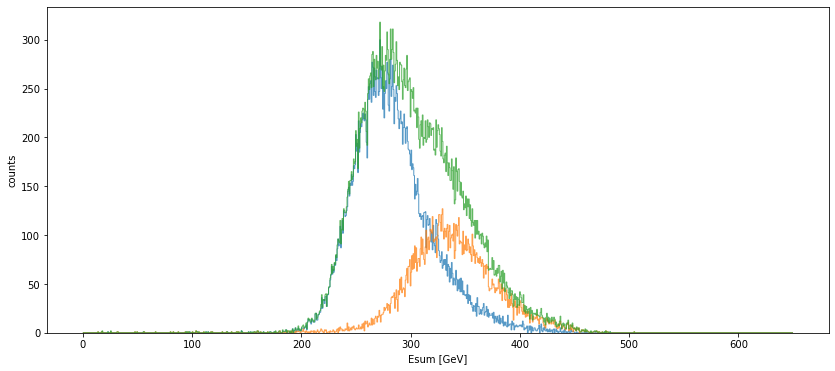

In [6]:
fig = plt.figure(figsize=(14.0,6.0))
## total energy sum in MIPs
print(np.shape(RechitEn_pkl[0]))
print(RechitEn_pkl[0])
en_min = 298
en_max= 302
rechitEn_pkl = RechitEn_pkl[np.logical_and(trueEn_pkl>=en_min ,trueEn_pkl<=en_max)]
rechitZ1_pkl = rechitZ_pkl[np.logical_and(trueEn_pkl>=en_min ,trueEn_pkl<=en_max)]
Esum = ak.sum(rechitEn_pkl,axis=1)
SS_locat = SS_loc_pkl[np.logical_and(trueEn_pkl>=en_min ,trueEn_pkl<=en_max)]
#rechitEn_pkl =rechitEn_pkl[]
## energy sum in EE
SSin_EE = ak.sum(rechitEn_pkl[SS_locat<28],axis=1) # np.logical_and(rechitZ1_pkl<54], axis=1)
MipsIn_EE = ak.sum(rechitEn_pkl[SS_locat>28],axis=1)
Esum = ak.sum(rechitEn_pkl, axis=1)
#Esum_AH = ak.sum(rechitEn_pkl[rechitZ1_pkl>154], axis=1)
#fig, ax = plt.subplots(figsize=(20,10))
plt.hist(SSin_EE, bins=1000, histtype='step', range=[0,15000],alpha=0.75,label='Showeirng in EE')
plt.hist(MipsIn_EE,  bins=1000,histtype='step', range=[0,15000],alpha=0.75,label='MIPs like in EE')
plt.hist(Esum,  bins=1000, histtype='step',range=[0,15000],alpha=0.75,label='All events')
#plt.hist(Esum,  bins=1000, histtype='step',range=[0,15000],alpha=0.5,label='Total energy')

plt.xlabel('Esum [MIPs]')
plt.ylabel('counts')
#plt.SetLogy()
plt.legend()

frac =  ((rechitZ1_pkl<54)*0.0105) + (np.logical_and(rechitZ1_pkl>54, rechitZ1_pkl<154)*0.0789) + ((rechitZ1_pkl>154)*0.0316)
rechitEn_pkl = rechitEn_pkl*frac
SSin_EE_GeV = ak.sum(rechitEn_pkl[SS_locat<28],axis=1) # np.logical_and(rechitZ1_pkl<54], axis=1)
MipsIn_EE_GeV = ak.sum(rechitEn_pkl[SS_locat>28],axis=1)
Esum_geV = ak.sum(rechitEn_pkl, axis=1)
#plt.yscale('log', nonposy='clip')
plt.title("300 GeV pion, energy sum CE-E+CE-H+AHCAL")
import matplotlib.pyplot as plt1
fig1 = plt1.figure(figsize=(14.0,6.0))

plt1.hist(SSin_EE_GeV, bins=1000, histtype='step', range=[0,650],alpha=0.75,label='Showeirng in EE')
plt1.hist(MipsIn_EE_GeV,  bins=1000,histtype='step', range=[0,650],alpha=0.75,label='MIPs like in EE')
plt1.hist(Esum_geV,  bins=1000, histtype='step',range=[0,650],alpha=0.75,label='All events')
plt.xlabel('Esum [GeV]')
plt.ylabel('counts')
#plt.xlim(0,600)

284.0329356342854
36.58347520712875


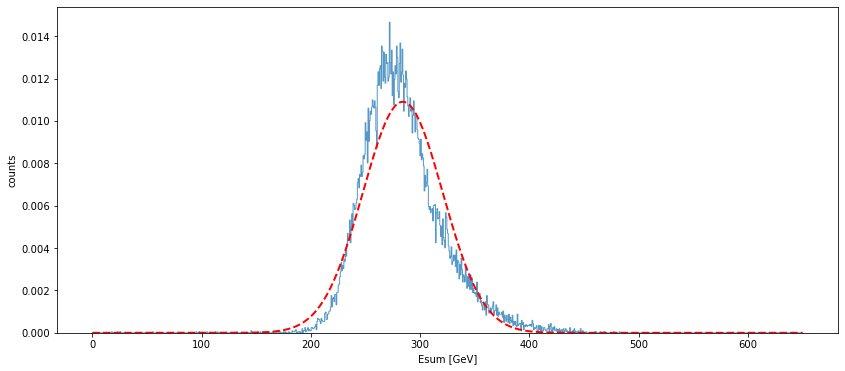

In [7]:
fig = plt.figure(figsize=(14.0,6.0))

import scipy
from scipy.stats import norm
import matplotlib.mlab as mlab

mu, sigma = scipy.stats.norm.fit(SSin_EE_GeV)
n, bins, patches = plt.hist(SSin_EE_GeV, bins=1000,  density=True ,histtype='step', range=[0,650],alpha=0.75,label='Showeirng in EE')
print(mu)
print(sigma)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)

plt.xlabel('Esum [GeV]')
plt.ylabel('counts')
l = plt.plot(bins, best_fit_line, 'r--', linewidth=2)
#plt.plot(best_fit_line,bins)

337.7302522424585
41.18820141853318


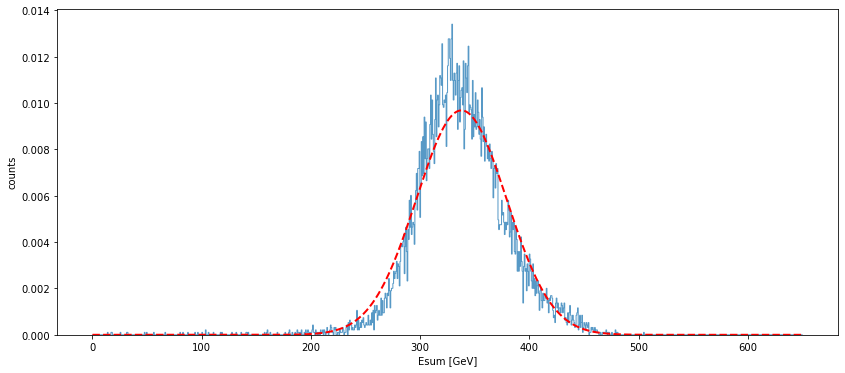

In [80]:
fig = plt.figure(figsize=(14.0,6.0))

import scipy
from scipy.stats import norm
import matplotlib.mlab as mlab

mu, sigma = scipy.stats.norm.fit(MipsIn_EE_GeV)
n, bins, patches = plt.hist(MipsIn_EE_GeV, bins=1000,  density=True ,histtype='step', range=[0,650],alpha=0.75,label='Mips like in EE')
print(mu)
print(sigma)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)

plt.xlabel('Esum [GeV]')
plt.ylabel('counts')
l = plt.plot(bins, best_fit_line, 'r--', linewidth=2)
#plt.plot(best_fit_line,bins)